<a href="https://colab.research.google.com/github/DevCielo/neural-networks-from-scratch/blob/main/Neural_Networks_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Google Colab by **Cielo Nicolosi**

After taking the machine learning specialization and deep learning specialization by Andrew Ng it ignited my passion for understanding the mathematical foundations of neural networks and my ambition to innovate within this domain drove me to undertake this project.

To solidify my knowledge of these concepts, I outline my entire thought process on the mathematics and the code I wrote to recreate foundational architectures including LeNet-5, AlexNet, and ResNet in the Colab. By implementing these models from scratch using **NumPy**, I delved into their fundamental operations, gaining insights into the combination of mathematical theory and practical design. Furthermore, I re-implemented these architectures in **TensorFlow** and **PyTorch** to gain hands-on experience with frameworks to bridge the gap between foundational understand and common practices.

Building upon this knowledge, I designed my own hybrid architecture that blends the strengths of AlexNet's feature extraction and ResNet's residual connections. This architecture not only achieved a remarkable **PLACEHOLDER ACCURACY** on the CIFAR-10 dataset, surpassing standard benchmarks, but also demonstrated the potential for innovation through hybridization.

To provide meaningful interpretations of the model's decisions, I employed advanced visualization techniques like **Grad-CAM**, making the feature maps and class activation heatmaps comprehensible and actionable. Additionally, I ensured the accessibility of these models by developing user-friendly REST APIs with **Flask** and **FastAPI**, accompanied by an interactive web interface for real-time image classification and architecture selection.

This website can be viewed at: <LINK>

This project also emphasized efficiency and scalability by creating **custom training pipelines** featuring **learning rate schedules**, **early stopping mechanisms**, and **batch normalization** significantly reduced training time while preserving high accuracy. Leveraging transfer learning with pre-trained models extended the hybrid architecture’s capabilities across diverse datasets, demonstrating its versatility beyond CIFAR-10.

# LeNet-5 with Tensorflow


**Building CNN's with tensorflow and from scratch**

Before delving into the mathematical foundations of LeNet-5, it was essential to thoroughly understand its architecture. To achieve this, I began by re-implementing LeNet-5 using TensorFlow. This allowed me to internalize its structural components and their interactions.

As described in the paper “Gradient-Based Learning Applied to Document Recognition” by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner (1998), the LeNet-5 architecture was designed specifically for handwritten digit recognition tasks, particularly for the MNIST dataset.


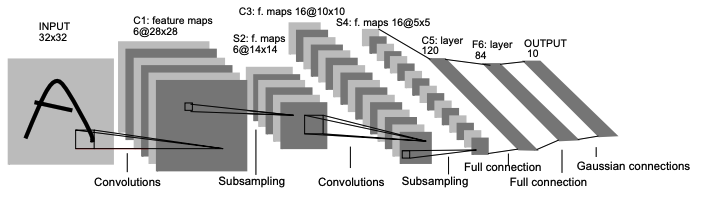


As shown from the image, the model consists of the following layers and components:

1. **Input Layer:**
The input to LeNet-5 is a 32×32×1 grayscale image. The original design resized the MNIST dataset images (28×28) to match this input size, accommodating the spatial dimensions needed for convolutional processing.

2. **Convolutional Layer 1:**
A convolutional layer with 6 filters of size 5×5, applied with a stride of 1, producing a feature map of size 28×28×6. This layer captures basic edge and texture features from the input image.

3. **Subsampling Layer 1 (Average Pooling):**
A 2×2 average pooling layer with a stride of 2, reducing the feature map dimensions to 14×14×6. This down-sampling helps in dimensionality reduction and introduces translation invariance.

4. **Convolutional Layer 2:**
Another convolutional layer with 16 filters of size 5×5, applied with a stride of 1, generating a feature map of size 10×10×16. This layer captures more complex features by combining information from the previous layer.

5. **Subsampling Layer 2 (Average Pooling):**
A second 2×2 average pooling layer with a stride of 2, resulting in a feature map of size 5×5×16. This step further reduces spatial dimensions and consolidates feature information.

6. **Convolutional Layer 3:**
A layer with 120 filters of size 5×5, applied across the 5×5×16 feature map, yielding an output of size 1×1×120. This layer serves as a fully connected feature extractor.

7. **Fully Connected Layers:**
The extracted features are flattened and passed through two fully connected layers: A dense layer with 84 neurons, inspired by biological neural networks.
An output layer with 10 neurons, representing the 10 classes of the MNIST dataset, using a softmax activation function for classification.


In my TensorFlow implementation, I adhered closely to the original architecture while leveraging modern deep learning practices to ensure efficiency and reproducibility. This implementation involved defining the convolutional, pooling, and fully connected layers using TensorFlow's Conv2D, AveragePooling2D, and Dense layers. The model was then trained on the MNIST dataset to replicate the results presented in the original paper.

To further evaluate the model's performance, I visualized the training process using accuracy and loss curves. These plots demonstrated consistent improvement in both training and validation metrics, confirming the model's ability to generalize effectively.

Additionally, the model's predictions were validated with visual outputs, showcasing its capability to correctly classify handwritten digits from the test set. For instance, when given a sample image, the model confidently predicted the correct digit, as highlighted in the accompanying visualization.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def LeNet5():
  model = tf.keras.Sequential([
      # Convolution Layer
      tf.keras.layers.Conv2D(6, (5, 5), activation='tanh', strides=(1, 1), padding='valid', name='conv0'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool0'),
      # Convolution Layer
      tf.keras.layers.Conv2D(16, (5, 5), strides=(1,1), padding='valid', activation='tanh', name='conv1'),
      # Average Pooling Layer
      tf.keras.layers.AveragePooling2D((2,2), strides=(2,2), name='avg_pool1'),
      # Convolution Layer
      tf.keras.layers.Conv2D(120, (5, 5), strides=(1, 1), padding='valid', activation='tanh', name='conv2'),
      # Flatten the output
      tf.keras.layers.Flatten(),
      # Fully Connected Layer
      tf.keras.layers.Dense(84, activation='tanh', name='fc1'),
      tf.keras.layers.Dense(10, activation='softmax', name='output'),
  ])

  return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8486 - loss: 0.5049 - val_accuracy: 0.9710 - val_loss: 0.0954
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9675 - loss: 0.1067 - val_accuracy: 0.9762 - val_loss: 0.0791
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9803 - loss: 0.0628 - val_accuracy: 0.9820 - val_loss: 0.0647
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9852 - loss: 0.0476 - val_accuracy: 0.9863 - val_loss: 0.0514
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9852 - val_loss: 0.0534
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9855 - val_loss: 0.0531
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9840 - val_loss: 0.0538
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step 

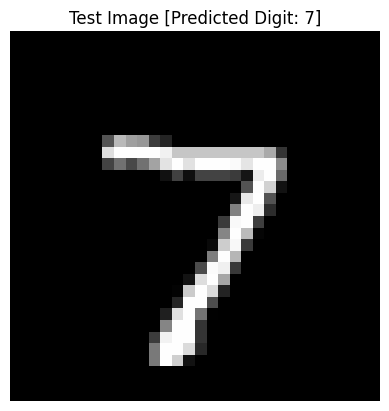

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1) to match the input shape of LeNet-5a
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Create the model
model = LeNet5()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Make a prediction on the first test image
prediction = model.predict(test_images[0:1])
predicted_digit = np.argmax(prediction)
print(f"Predicted digit: {predicted_digit}")

# Show the test image
plt.imshow(test_images[0].squeeze(), cmap='gray')
plt.title(f"Test Image [Predicted Digit: {predicted_digit}]")
plt.axis('off')
plt.show()

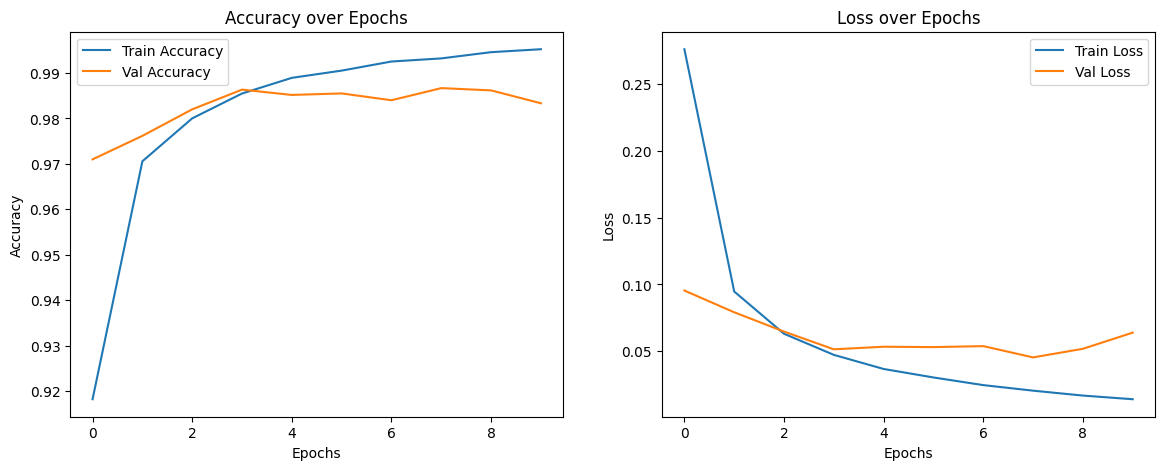

In [4]:
# Plot the training and validation accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
ax1.set_title('Accuracy over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Val Loss')
ax2.set_title('Loss over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# LeNet-5 with PyTorch

Similar to Tensorflow, an implementation of LeNet-5 was built using PyTorch to solidify knowledge of common ML frameworks.

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:
class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)
    self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
    self.conv3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)

    self.fc1 = nn.Linear(120, 84)
    self.fc2 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.tanh(self.conv1(x))
    x = F.avg_pool2d(x, kernel_size=2, stride=2)
    x = F.tanh(self.conv2(x))
    x = F.avg_pool2d(x, kernel_size=2, stride=2)
    x = F.tanh(self.conv3(x))
    x = torch.flatten(x, 1)
    x = F.tanh(self.fc1(x))
    x = F.softmax(self.fc2(x), dim=1)
    return x


In [7]:
transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
])

In [8]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LeNet5().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 494kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [9]:
num_epochs = 10
train_accuracy, val_accuracy = [], []

for epoch in range(num_epochs):
    model.train()
    correct, total = 0, 0
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy.append(100 * correct / total)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


Epoch [1/10], Loss: 1.5914, Accuracy: 88.63%
Epoch [2/10], Loss: 1.5033, Accuracy: 96.14%
Epoch [3/10], Loss: 1.4906, Accuracy: 97.28%
Epoch [4/10], Loss: 1.4854, Accuracy: 97.72%
Epoch [5/10], Loss: 1.4815, Accuracy: 98.08%
Epoch [6/10], Loss: 1.4791, Accuracy: 98.32%
Epoch [7/10], Loss: 1.4766, Accuracy: 98.53%
Epoch [8/10], Loss: 1.4753, Accuracy: 98.66%
Epoch [9/10], Loss: 1.4741, Accuracy: 98.79%
Epoch [10/10], Loss: 1.4731, Accuracy: 98.86%


Test Accuracy: 98.35%
Predicted digit: 7


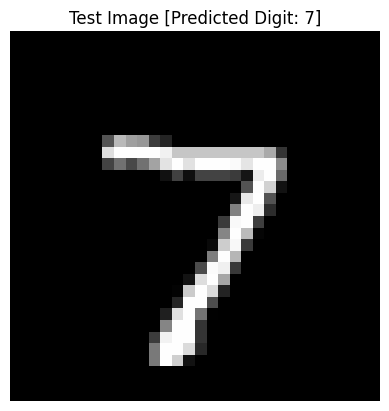

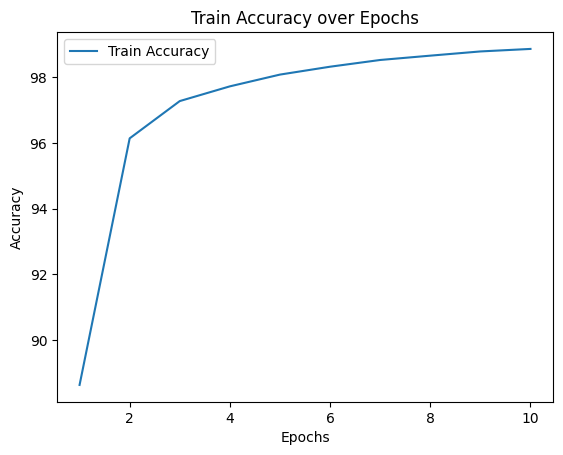

In [10]:
model.eval()
correct, total = 0, 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Make a prediction
sample_image, sample_label = next(iter(test_loader))
sample_image = sample_image[0:1].to(device)
prediction = model(sample_image)
predicted_digit = torch.argmax(prediction, 1).item()

print(f"Predicted digit: {predicted_digit}")
plt.imshow(sample_image.cpu().squeeze(), cmap='gray')
plt.title(f"Test Image [Predicted Digit: {predicted_digit}]")
plt.axis('off')
plt.show()

# Plot training accuracy
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Train Accuracy')
plt.title('Train Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# LeNet-5 from scratch

Having successfully implemented LeNet-5 in TensorFlow and PyTorch, I gained a thorough understanding of modern frameworks and their high-level abstractions. However, this abstraction hides the underlying mathematical operations that drive convolutional neural networks. To bridge this gap and deepen my knowledge, I decided to implement LeNet-5 from scratch using NumPy.


## Forward propagation


We use a convolution to extract features from data, such as patterns like edges, textures or shapes.

The forward pass is used to compute the output of the neural network given an input. It involves passing the input data through each layer of the network to produce predictions or scores. It follows the steps:
1. Input data flows through the network layer to layer where each layers takes the outpot of the previous layer.
2. Each layer performs computations (like convolutions to detect patterns, matrix multiplications to combine and transform data, and activation functions to model complex relationships)
3. The final output is the prediction (if in the final layer) or the transformed features (in intermediate layers).

Essentially, during training, the forward pass generates predictions which are then compared to the true labels to compute the loss. This loss is calculated by applying the softmax function and then using cross-entropy loss. During inference (testing), the forward pass directly computes predictions from input data without loss being computed.

In [29]:
def conv2d(input, filters, bias, stride=1, padding=0):
    # Unpack the dimensions of the filters (n_f = number of filters, f = filter size, n_c = number of channels in output)
    (n_f, f, f, n_c) = filters.shape

    # Unpack the dimensions of the input (in_dim = input image height and width, n_c_in = number of input channels)
    (in_dim, in_dim, n_c_in) = input.shape

    # Calculate the output dimension using the formula for the spatial dimensions of a convolutional layer:
    # (input_dim + 2*padding - filter_size) / stride + 1
    out_dim = int((in_dim + 2*padding - f) / stride) + 1

    # Initialize the output tensor with zeros. The shape of the output is (out_dim, out_dim, n_f).
    # This means the output will have spatial dimensions (out_dim, out_dim) and depth of n_f (number of filters).
    output = np.zeros((out_dim, out_dim, n_f))

    # Add zero padding to the input image along height and width dimensions.
    # Only the spatial dimensions (height and width) are padded, not the channel dimension.
    # 'padding' controls how many rows/columns of zeros are added around the input.
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)

    # Loop over each filter (n_f filters in total)
    for i in range(n_f):
        # Loop over the output's height (out_dim) dimension
        for h in range(out_dim):
            # Loop over the output's width (out_dim) dimension
            for w in range(out_dim):
                # Calculate the starting and ending indices of the current slice of the input
                # for the current sliding window position (h, w). This defines the region of the input
                # that we will apply the filter to.
                h_start = h * stride
                h_end = h_start + f
                w_start = w * stride
                w_end = w_start + f

                # Perform element-wise multiplication between the current filter and the corresponding
                # region in the padded input, then sum all the values. Add the bias for the current filter.
                # This is essentially performing the convolution operation.
                output[h, w, i] = np.sum(input_padded[h_start:h_end, w_start:w_end, :] * filters[i]) + bias[i]

    # Return the result of the convolution operation, which is the output feature map.
    return output

**Breakdown**

1. **Input Dimensions:**
The input is a 3D tensor with shape (height, width, number_of_channels).

2. **Filters/Kernels:**
Filters are learnable parameters with dimensions (num_filters, filter_height, filter_width, num_channels). They are essentially designed to detect certain patterns. Usually many filters are used to detect different patterns (e.g. edges, curves, textures etc.)

3. **Stride**:
The stride defines how much the filter slides over the input:
Stride = 1 means filter moves 1 pixel at a time, producing a denser output.
Stride = 2 means filter skips 1 pixel between positions, producing a smaller output.

4. **Padding**:
Padding adds rows and columns of zeros around the input to:
 - Preserve spatial dimensions so that outputs have same size as inputs.
 - Reduces shrinking of the input too quickly to avoid loss of spatial information and poor generalization.

 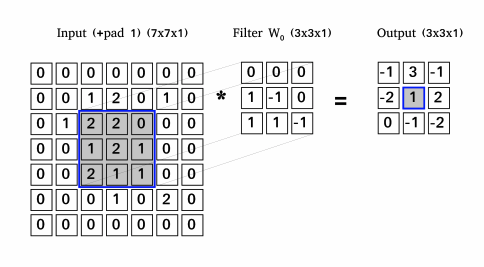

 As shown in this example a filter of size 3x3x1 is applied to an input, with a stride of 2 and padding size of 1 applied to the row and columns.

5. **Output dimensions**: The output dimensions are calculated using the formula:

$$
\text{Output Dimension} = \frac{\text{Input Dimension} + 2 \times \text{Padding} - \text{Filter Size}}{\text{Stride}} + 1
$$

(From Andrew Ng's Deep Learning Specialization Course)

6. **Element-wise multiplication**: At each position the element-wise multiplication between the filter and input region compares the filter's patterns with that part of the input. The summed result indicates how much the input "matches" the pattern in the filter. High means strongly matches, low means doesn't match. A bias is also added to allow each filter to adapt its detection threshold even more (so that it does not solely rely on just the weighted sum of inputs)


**Example**

The example below simulates the first convolutional layer in the LeNet-5 Architecture. Essentially it involves an image of dimenions 32x32x1 (height, width, channel) having 6 filters of size 5x5 applied to it in order to detect patters such as edges or corners effectively resulting in an output of size 28x28x6 (using the formula from above).

In [30]:
# Example usage of conv2d function (Equal to the first step in LeNet-5)
input = np.random.randn(32, 32, 1)
filters = np.random.randn(6, 5, 5, 1)
bias = np.random.randn(6)
output = conv2d(input, filters, bias, stride=1, padding=0)
print(output.shape)
# Expected Output: (28, 28, 6)

(28, 28, 6)


## Forward Propagation Partial Connectivity

In [31]:
def conv2d_partial(input, filters, biases, connection_table, stride=1, padding=0):
    num_filters = len(filters)
    (in_h, in_w, _) = input.shape
    f_h, f_w = filters[0].shape[:2]
    out_h = int((in_h + 2 * padding - f_h) / stride) + 1
    out_w = int((in_w + 2 * padding - f_w) / stride) + 1
    output = np.zeros((out_h, out_w, num_filters))
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), 'constant')
    for i in range(num_filters):
        connected_inputs = [idx for idx, connected in enumerate(connection_table[i]) if connected]
        input_subset = input_padded[:, :, connected_inputs]
        filt = filters[i]
        bias = biases[i]
        for h in range(out_h):
            for w in range(out_w):
                h_start = h * stride
                h_end = h_start + f_h
                w_start = w * stride
                w_end = w_start + f_w
                region = input_subset[h_start:h_end, w_start:w_end, :]
                output[h, w, i] = np.sum(region * filt) + bias
    return output

## Backpropagation

The backward pass is used to compute the gradients of the loss with respect to all the parameters (weights + biases) in the network. This is necessary for updating the weights using optimization algorithms like Stochastic Gradient Descent.

After the loss is calculated, backpropagation starts at the output layer and propagates the error (loss) backgward through the network. At each layer, gradients are calculated to determine how much the loss changes with each parameter in the network. This is calculated using the chain rule. These gradients are then utilized to update parameters in the network using optimizers.

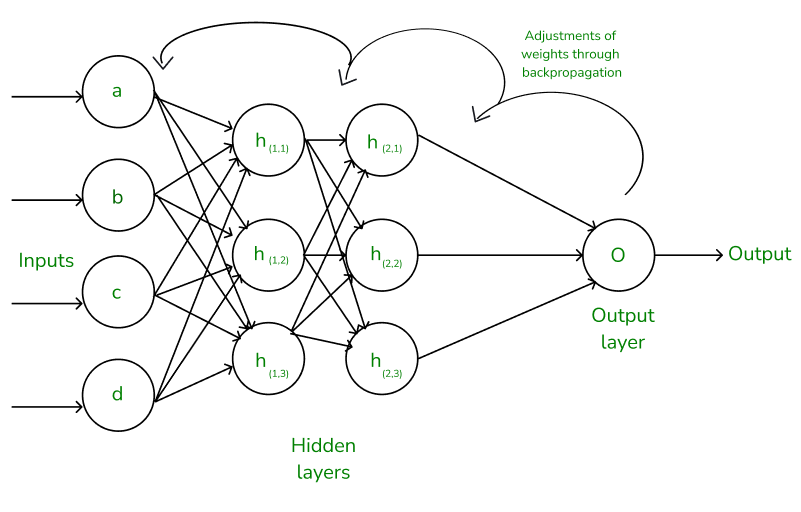

This is done to minimize the loss function, improving the model's predictions over time. Essentially, it allows the network to learn from data by adjusting weights in the direction that reduces the loss.


In [32]:
def conv2d_backward(d_out, input, filters, stride=1, padding=0):
    # Unpack the dimensions of the filters (n_f = number of filters, f = filter size, n_c = number of output channels)
    (n_f, f, f, n_c) = filters.shape

    # Unpack the dimensions of the input (in_dim = input image height and width, n_c_in = number of input channels)
    (in_dim, in_dim, n_c_in) = input.shape

    # Get the spatial dimensions of the output gradient (this is the same as the output dimension from the forward pass)
    out_dim = d_out.shape[0]

    # Pad the input to handle border effects as in the forward pass
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), mode='constant', constant_values=0)

    # Initialize the gradient for the padded input, which will be backpropagated to the input
    d_input_padded = np.zeros_like(input_padded)

    # Initialize the gradient for the filters and biases, which will be updated during backpropagation
    d_filters = np.zeros_like(filters)
    d_bias = np.zeros((n_f,))

    # Loop over each filter (n_f filters in total)
    for i in range(n_f):
        # Loop over the output's height (out_dim) dimension
        for h in range(out_dim):
            # Loop over the output's width (out_dim) dimension
            for w in range(out_dim):
                # Calculate the starting and ending indices of the current slice of the input for this sliding window position (h, w)
                h_start = h * stride
                h_end = h_start + f
                w_start = w * stride
                w_end = w_start + f

                # Compute the gradient with respect to the input by multiplying the filter with the upstream gradient
                # and adding it to the corresponding region in the padded input's gradient.
                d_input_padded[h_start:h_end, w_start:w_end, :] += filters[i] * d_out[h, w, i]

                # Compute the gradient with respect to the filters by multiplying the input slice by the corresponding
                # upstream gradient. This updates the filter's gradient.
                d_filters[i] += input_padded[h_start:h_end, w_start:w_end, :] * d_out[h, w, i]

                # Compute the gradient with respect to the bias by summing the upstream gradients for each filter.
                d_bias[i] += np.sum(d_out[:, :, i])

    # If padding was applied, remove the padding from the gradient with respect to the input.
    if padding != 0:
        d_input = d_input_padded[padding:-padding, padding:-padding, :]
    else:
        d_input = d_input_padded

    # Return the gradients with respect to the input, filters, and biases.
    return d_input, d_filters, d_bias


In this code, three types of gradients are calculated during backpropagation:

**Gradient w.r.t input** (`d_input_padded`):

 How much the loss changes if the input to this layer changes slightly. During the forward pass the filter only "sees" a small part of the input. Therefore in the backward pass, we take the gradient from the output and assign responsibility for that error to the part of the input that the filter "saw". So essentially we take the filter and multiply it by the error (loss) at that position (`d_out`) and add the result back to the region in the input gradient (`d_input`).

If:
$$
z = \text{Input Region} \cdot \text{Filter}
$$

Then, the gradient of the loss with respect to the input region is calculated as:
$$
\frac{\partial \text{Loss}}{\partial \text{Input Region}} = \text{Filter} \cdot \frac{\partial \text{Loss}}{\partial z}
$$

This formula shows how the error signal ($\frac{\partial \text{Loss}}{\partial z}$) is propagated backward through the filter to assign "blame" to the input region that contributed to the error. For sake of understanding here is an example with numbers:
- The input region is:
$$
[2, 3]
$$
- The filter is:
$$
[4, 5]
$$
- The upstream gradient (from `d_out`) is:
$$
6
$$

The output (z) for this region is calculated as:
$$
z = 2 \cdot 4 + 3 \cdot 5 = 8 + 15 = 23
$$

---

#### Backward Pass:
Now we calculate the gradient w.r.t. the input region using the chain rule:

From the chain rule:
$$
\frac{\partial \text{Loss}}{\partial \text{Input Region}} = \text{Filter} \cdot \frac{\partial \text{Loss}}{\partial z}
$$

Using the filter ([4,5]) and the upstream gradient (6):
$$
\frac{\partial \text{Loss}}{\partial \text{Input Region}} = [4, 5] \cdot 6 = [24, 30]
$$

---

#### Result:
The gradient tells us:
- The first input value (2) contributed 24 to the loss.
- The second input value (3) contributed 30 to the loss.

---
**Gradient w.r.t Filters** (`d_filters`)

This gradient tells us how much the loss changes if the filter values change slightly. During the forward pass, the filter "looks" at a specific region of the input and creates the output. In the backward pass, we calculate how much each value in the filter contributed to the error at that position. Essentially, the filter gradient is teaching the filter how to change to reduce the loss.

For each output position:
- Take the **input region** the filter "saw."
- Multiply it by the error at that position (`d_out`).
- Add the result to the filter's gradient.

If:
$$
z = \text{Input Region} \cdot \text{Filter}
$$

Then, the gradient of the loss with respect to the filter is:
$$
\frac{\partial \text{Loss}}{\partial \text{Filter}} = \text{Input Region} \cdot \frac{\partial \text{Loss}}{\partial z}
$$

---

#### Example with Numbers:
- **Input Region**:
$$
[2, 3]
$$
- **Filter**:
$$
[4, 5]
$$
- **Upstream Gradient** (from `d_out`):
$$
6
$$

#### Backward Pass:
From the chain rule:
$$
\frac{\partial \text{Loss}}{\partial \text{Filter}} = \text{Input Region} \cdot \frac{\partial \text{Loss}}{\partial z}
$$

Using the input region ([2, 3]) and the upstream gradient (6):
$$
\frac{\partial \text{Loss}}{\partial \text{Filter}} = [2, 3] \cdot 6 = [12, 18]
$$

---

#### Result:
- The first filter value (4) needs to be adjusted by **12**.
- The second filter value (5) needs to be adjusted by **18**.

This adjustment reduces the error during the next training step.

---
**Gradient w.r.t Bias** (`d_bias`)

This gradient tells us how much the loss changes if the bias value changes slightly. During the forward pass, the bias is added to every output of the filter uniformly. In the backward pass, we calculate the bias gradient by summing all the errors (`d_out`) from the output feature map.

The gradient of the loss with respect to the bias is:
$$
\frac{\partial \text{Loss}}{\partial \text{Bias}} = \sum \frac{\partial \text{Loss}}{\partial z}
$$

---

#### Example with Numbers:
- **Upstream Gradient** (from `d_out`):
$$
[6, 8, 4]
$$

#### Backward Pass:
Summing the upstream gradients for a single filter:
$$
\frac{\partial \text{Loss}}{\partial \text{Bias}} = 6 + 8 + 4 = 18
$$

---

#### Result:
The bias needs to be adjusted by **18** to reduce the error.





## Backpropagation Partial Connectivity

In [33]:
def conv2d_backward_partial(d_out, input, filters, connection_table, stride=1, padding=0):
    num_filters = len(filters)
    (in_h, in_w, in_c) = input.shape
    f_h, f_w = filters[0].shape[:2]
    input_padded = np.pad(input, ((padding, padding), (padding, padding), (0, 0)), 'constant')
    d_input_padded = np.zeros_like(input_padded)
    d_filters = [np.zeros_like(filters[i]) for i in range(num_filters)]
    d_biases = np.zeros(num_filters)
    out_h, out_w = d_out.shape[:2]
    for i in range(num_filters):
        connected_inputs = [idx for idx, connected in enumerate(connection_table[i]) if connected]
        for h in range(out_h):
            for w in range(out_w):
                h_start = h * stride
                h_end = h_start + f_h
                w_start = w * stride
                w_end = w_start + f_w
                region = input_padded[h_start:h_end, w_start:w_end, connected_inputs]
                d_filters[i] += region * d_out[h, w, i]
                d_input_padded[h_start:h_end, w_start:w_end, connected_inputs] += filters[i] * d_out[h, w, i]
                d_biases[i] += d_out[h, w, i]
    if padding != 0:
        d_input = d_input_padded[padding:-padding, padding:-padding, :]
    else:
        d_input = d_input_padded
    return d_input, d_filters, d_biases

## Average Pooling

For each channel, a window of size: size x size is moved across the input, starting at the top left corner and sliding across the stride. At each position of the window, the values within the window are averaged. The average value is assigned to the corresponding position in the output feature.

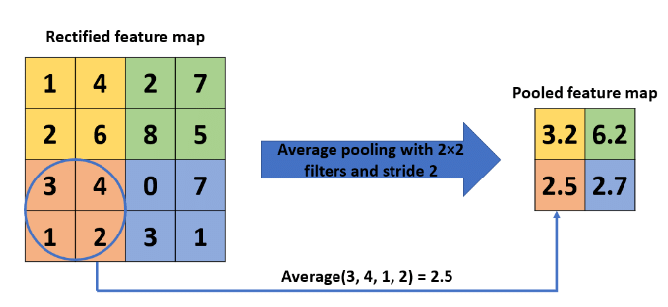

Average pooling reduces the spatial dimensions of the input (height and width) while retaining important information by average values in each window. This results in a downsampled representation which is useful for reducing computational complexity and controlling overfitting.

In [34]:
def average_pooling(input, size=2, stride=2):
    # Unpack the dimensions of the input (in_dim = input height and width, n_c = number of channels)
    (in_dim, in_dim, n_c) = input.shape

    # Calculate the output dimension using the formula for pooling layers:
    # (input_dim - pool_size) / stride + 1
    out_dim = int((in_dim - size) / stride) + 1

    # Initialize the output tensor with zeros. The shape of the output is (out_dim, out_dim, n_c).
    # This means the output will have spatial dimensions (out_dim, out_dim) and depth equal to the number of input channels (n_c).
    output = np.zeros((out_dim, out_dim, n_c))

    # Loop over each channel (n_c represents the number of channels in the input)
    for c in range(n_c):
        # Loop over the output's height (out_dim) dimension
        for h in range(out_dim):
            # Loop over the output's width (out_dim) dimension
            for w in range(out_dim):
                # Calculate the starting and ending indices of the current slice of the input
                # for the current window position (h, w). This defines the region of the input
                # that we will apply average pooling to.
                h_start = h * stride
                h_end = h_start + size
                w_start = w * stride
                w_end = w_start + size

                # Calculate the average of the values in the current window (h_start:h_end, w_start:w_end)
                # for the current channel (c), and assign it to the output at position (h, w, c).
                output[h, w, c] = np.mean(input[h_start:h_end, w_start:w_end, c])

    # Return the result of the average pooling operation, which is the pooled output feature map.
    return output


For LeNet-5 specifically a pooling window (2x2) moves across the data with a stride of 2 meaning the window moves 2 pixels each time.

**Example**

Suppose the following input tensor:

```
input = np.array([[[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12],
                   [13, 14, 15, 16]]])
```
This input has dimensions 4x4x1, meaning its a 4x4 grid with one channel.

Now, using an average_pooling with a pooling window size of 2x2 and a stride of 2 the output dimensions will be:
$$
\frac{4 - 2}{2} + 1 = 2
$$

Therefore the output will be 2x2x1.

Now for a pooling window first we look at the top left:


```
[1, 2]
[5, 6]
```
The average of this would be:
$$
\frac{(1 + 2 + 5 + 6)}{4} = 3.5
$$

You would then move the pooling window to the right by 2 so now you look at:

```
[3, 4]
[7, 8]
```
This is equal to 5.5.
This would then move down to:
```
[9, 10]
[13, 14]
```
Which averages to 11.5. Finally you would look at:
```
[11, 12]
[15, 16]
```
Which averages to 13.5. The result of this average pooling is:
```
[3.5, 5.5]
[11.5, 13.5]
```
This still maintains most of the information (by averaging it) but effectively reduces a 4x4x1 grid to a 2x2x1 grid to make the process less computationally complex.





## Average Pooling Backwards

The backward pass for average pooling is similar to average pooling forwards except that it instead computes how the loss changes with respect to the input by distributing the gradient from the output (`d_out`) evenly back to the regions in the input. Essentially, the gradient from the output is equally distributed back to all the elements in the pooling window of the input.

In [35]:
def average_pooling_backward(d_out, input, size=2, stride=2):
    # Unpack the dimensions of the input (in_dim = input height and width, n_c = number of input channels)
    (in_dim, in_dim, n_c) = input.shape

    # Get the output dimensions (out_dim = output height and width), which match the dimensions of d_out
    out_dim = d_out.shape[0]

    # Initialize a zero array for the gradient of the input (same shape as the original input)
    d_input = np.zeros_like(input)

    # Loop over each channel (n_c represents the number of channels in the input)
    for c in range(n_c):
        # Loop over the output's height (out_dim) dimension
        for h in range(out_dim):
            # Loop over the output's width (out_dim) dimension
            for w in range(out_dim):
                # Calculate the starting and ending indices of the current slice of the input
                # for the current window position (h, w). This defines the region of the input
                # to which we will distribute the gradient.
                h_start = h * stride
                h_end = h_start + size
                w_start = w * stride
                w_end = w_start + size

                # Calculate the gradient for each element in the current pooling window.
                # The gradient of the output pixel (d_out[h, w, c]) is equally distributed
                # across the elements in the corresponding pooling window. This is because
                # in average pooling, the forward pass averaged the values, so we now
                # distribute the gradient evenly back to the original elements.
                gradient = d_out[h, w, c] / (size * size)

                # Distribute the calculated gradient across the window in the input's gradient map.
                # This means we add the gradient to all elements in the original input that contributed
                # to the output at (h, w, c).
                d_input[h_start:h_end, w_start:w_end, c] += gradient

    # Return the gradient of the input after backpropagating through the average pooling layer.
    return d_input


Take the upstream gradient as:

\begin{bmatrix}
1 & 2 \\
3 & 4
\end{bmatrix}

---


#### **Top-Left Window**
- Original Input:

\begin{bmatrix}
1 & 2 \\
5 & 6
\end{bmatrix}

- Gradient from \(d\_out[0, 0] = 1\) is distributed equally:
$$
\text{Gradient per element: } \frac{1}{4} = 0.25
$$
- Updated Gradient for the Input Window:

\begin{bmatrix}
0.25 & 0.25 \\
0.25 & 0.25
\end{bmatrix}

---

#### **Top-Right Window**
- Original Input:

\begin{bmatrix}
3 & 4 \\
7 & 8
\end{bmatrix}

- Gradient from \(d\_out[0, 1] = 2\):
$$
\text{Gradient per element: } \frac{2}{4} = 0.5
$$
- Updated Gradient for the Input Window:

\begin{bmatrix}
0.5 & 0.5 \\
0.5 & 0.5
\end{bmatrix}

---

This is similarly applied to the other two windows resulting in the final gradient for the input as:

\begin{bmatrix}
0.25 & 0.25 & 0.5 & 0.5 \\
0.25 & 0.25 & 0.5 & 0.5 \\
0.75 & 0.75 & 1.0 & 1.0 \\
0.75 & 0.75 & 1.0 & 1.0
\end{bmatrix}


## Activation Functions, Softmax, and Cross-Entropy Loss

Activations functions are used to help neural networks learn complex patterns. Essentially, they add flexibility by introducing non-linearity allowing the network to capture more complicated features like edges, textures and shapes.
The tanh functions maps inputs in the range (-1, 1) helping to normalize the data and making the learning smoother for the network. It follows the formula:
$$
\text{tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

For back propagation the derivative of tanh is used to calculate the gradient:
$$
\text{tanh}'(x) = 1 - \text{tanh}^2(x)
$$



---
Softmax is used at the output to convert raw scores (logits) into probabilities that sum to 1. For example, if there are 10 classes the probabilities of these 10 classes will be changed to sum to 1 together. This makes it simpler to interpret the model's predictions.

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$


---
Cross-Entropy Loss measures the difference between the model's predicted probabilities and true labels and essentially penalizes the neural network for incorrect predictions to guide the model during training to improve its predictions and reduce error.

$$
L = -\sum_{i} y_i \cdot \log(p_i)
$$

Where:
- y_i is the true label (one-hot encoded).
- p_i is the predicted probability for class i.

For back-propagation the derivative of cross-entropy loss is used:

$$
\frac{\partial L}{\partial z} = \text{probs} - \text{label}
$$


In [36]:
# Tanh activation function: Applies tanh to the input.
def tanh(x):
    return np.tanh(x)

# Derivative of tanh: Calculates gradient for backpropagation.
def tanh_derivative(output):
    return 1 - np.square(output)

# Softmax function: Converts logits into probabilities.
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exp_x / exp_x.sum(axis=0, keepdims=True)

# Cross-entropy loss: Computes the difference between predictions and true labels.
def cross_entropy_loss(probs, label):
    return -np.sum(label * np.log(probs + 1e-15))  # Avoid log(0) by adding epsilon.

# Derivative of cross-entropy loss: Calculates gradient for backpropagation.
def cross_entropy_derivative(probs, label):
    return probs - label


## Convolutional Layer Implementation

Utilizing all the functions defined earlier a 2D Convolution Layer class can now be constructed to combine everything together.


In [48]:
class Conv2D:
    def __init__(self, num_filters, filter_size, input_depth, stride=1, padding=0, connection_table=None):
        self.num_filters = num_filters
        self.filter_size = filter_size
        self.input_depth = input_depth
        self.stride = stride
        self.padding = padding
        self.connection_table = connection_table
        if connection_table is None:
            # Fully connected
            self.filters = np.random.randn(num_filters, filter_size, filter_size, input_depth) * np.sqrt(1.0 / (filter_size * filter_size * input_depth))
        else:
            # Partial connectivity
            self.filters = []
            for nf in range(num_filters):
                num_connected_inputs = sum(connection_table[nf])
                filt = np.random.randn(filter_size, filter_size, num_connected_inputs) * np.sqrt(1.0 / (filter_size * filter_size * num_connected_inputs))
                self.filters.append(filt)
        self.biases = np.zeros(num_filters)

    def forward(self, input):
        self.input = input
        if self.connection_table is None:
            self.output = conv2d(input, self.filters, self.biases, stride=self.stride, padding=self.padding)
        else:
            self.output = conv2d_partial(input, self.filters, self.biases, self.connection_table, stride=self.stride, padding=self.padding)
        return self.output

    def backward(self, d_out):
        if self.connection_table is None:
            d_input, d_filters, d_biases = conv2d_backward(d_out, self.input, self.filters, stride=self.stride, padding=self.padding)
        else:
            d_input, d_filters, d_biases = conv2d_backward_partial(d_out, self.input, self.filters, self.connection_table, stride=self.stride, padding=self.padding)
        self.d_filters = d_filters
        self.d_biases = d_biases
        return d_input

    def update(self, learning_rate):
        if self.connection_table is None:
            self.filters -= learning_rate * self.d_filters
        else:
            for i in range(len(self.filters)):
                self.filters[i] -= learning_rate * self.d_filters[i]
        self.biases -= learning_rate * self.d_biases



## Average Pooling Layer Implementation

In [38]:
class AveragePooling:
    # Defines the LeNet-5's given pooling window size (2x2) and stride (2)
    def __init__(self, size=2, stride=2):
        self.size = size
        self.stride = stride

    # Computes average of each pooling window in the input and outputs the down-sampled one
    def forward(self, input):
        self.input = input
        self.output = average_pooling(input, size=self.size, stride=self.stride)
        return self.output

    # Computes gradients for the input during backpropagation by distributing ouput gradient evenly
    def backward(self, d_out):
        d_input = average_pooling_backward(d_out, self.input, size=self.size, stride=self.stride)
        return d_input


## Fully Connected Layer Implementation

Fully connected layers are used to connect every input to every ouput allowing the model to essentially learn global relationships between features.

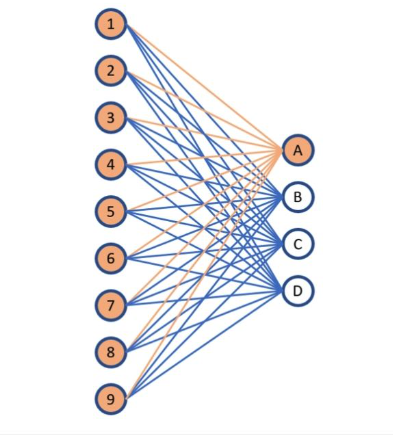

They form the backbone of dense layers which are used in the final stage of neural networks to make decisions or determine probabilities

Weights are randomly initialized using **Xavier Initialization**:
$$
\text{weights} \sim \text{Normal}(0, \frac{1}{\text{input size}})
$$

This helps to maintain stablility during training. All biases are initialized to zeros to avoid introducing bias at the start.

---

Forward propagation is used to apply a linear transformation to the input data:
$$
\text{output} = \text{weights} \cdot \text{input} + \text{biases}
$$

For example with an input of:
$$
\text{input} =
\begin{bmatrix}
1 \\
2
\end{bmatrix}
$$
And weights and biases of:
$$
\text{weights} =
\begin{bmatrix}
0.5 & -0.3 \\
0.8 & 0.1
\end{bmatrix}
$$
$$
\text{biases} =
\begin{bmatrix}
0.2 \\
-0.1
\end{bmatrix}
$$
The output is:
$$
\text{output} =
\begin{bmatrix}
0.5 & -0.3 \\
0.8 & 0.1
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
2
\end{bmatrix}
+
\begin{bmatrix}
0.2 \\
-0.1
\end{bmatrix}
=
\begin{bmatrix}
0.1 \\
1.7
\end{bmatrix}
$$

---

Backward propagation is used to calculate how much the loss changes with respect to weights, biases and input:
$$
\frac{\partial \text{loss}}{\partial \text{weights}} = \text{d_out} \otimes \text{input}
$$
$$
\frac{\partial \text{loss}}{\partial \text{biases}} = \text{d_out}
$$
$$
\frac{\partial \text{loss}}{\partial \text{input}} = \text{weights}^\top \cdot \text{d_out}
$$

---

The weights and biases are updated using **gradient descent**:
$$
\text{weights} \gets \text{weights} - \text{learning rate} \cdot \text{d_weights}
$$
$$
\text{biases} \gets \text{biases} - \text{learning rate} \cdot \text{d_biases}
$$

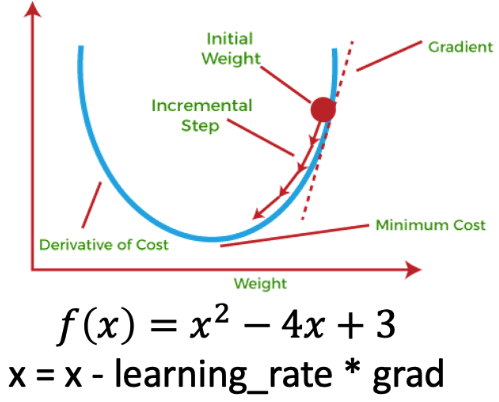


In [39]:
class FullyConnected:
    # Weights are initialized with random values scaled by sqrt(2/input_size) to maintain stability during training
    # Biases are initialized at zero
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size) * np.sqrt(1.0 / input_size)
        self.biases = np.zeros(output_size)

    # Computes predictions
    def forward(self, input):
        self.input = input
        self.output = np.dot(self.weights, input) + self.biases
        return self.output

    # Propagates errors to adjust the weights and biases for future predictions
    def backward(self, d_out):
        self.d_weights = np.outer(d_out, self.input)
        self.d_biases = d_out
        d_input = np.dot(self.weights.T, d_out)
        return d_input

    # Updates the weights and biases using backpropagation and gradient descent
    def update(self, learning_rate):
        self.weights -= learning_rate * self.d_weights
        self.biases -= learning_rate * self.d_biases


## Activation Functions, Softmax and Cross-Entropy Loss Layer Implementation

In [40]:
class TanhActivation:
    # Applies tanh function to input
    def forward(self, input):
        self.output = tanh(input)
        return self.output

    # Computes gradient for backpropagation using derivative of tanh function
    def backward(self, d_out):
        return d_out * tanh_derivative(self.output)


The softmax activation function (for probabilities) is combined with the cross-entropy loss (to measure prediction accuracy) for a SoftmaxCrossEntropyLoss class as they complement eachother in neural networks.

In [41]:
class SoftmaxCrossEntropyLoss:
    # Applies softmax to logits and computes cross-entropy loss
    def forward(self, logits, labels):
        self.labels = labels
        self.logits = logits
        self.probs = softmax(logits)
        loss = cross_entropy_loss(self.probs, labels)
        return loss

    # Computes gradient for backpropagation using derivative of cross-entropy loss
    def backward(self):
        return cross_entropy_derivative(self.probs, self.labels)


## LeNet-5 Neural Network Implementation

**TODO RBF LAYER**

As mentioned the structure of the LeNet-5 is the following:
1. **Convolutional Layers**
    - Three convolutional layers extract features from the input images
    - Each convolutional layer is followed by A Tanh Activation to add non-linearity and Average Pooling to reduce spatial dimensions and computation.

2. **Fully Connected Layers**
    - Two fully connected layers connect extracted features to final output transforming them into class probabilities

3. **Softmax and Cross-Entropy Loss**
    - The final layer uses softmax to convert logits into probabilits and cross-entropy loss to evaluate the accuracy of predictions



In [42]:
class LeNet5:
    def __init__(self):
        # Input image size is 32x32
        # First convolutional layer: 6 filters of size 5x5, stride 1, padding 0
        self.conv1 = Conv2D(num_filters=6, filter_size=5, input_depth=1, stride=1, padding=0)
        self.tanh1 = TanhActivation()
        self.pool1 = AveragePooling(size=2, stride=2)

        # Connection table for partial connectivity in conv2
        self.connection_table = self.create_connection_table()

        # Second convolutional layer: 16 filters, partial connectivity
        self.conv2 = Conv2D(num_filters=16, filter_size=5, input_depth=6, stride=1, padding=0, connection_table=self.connection_table)
        self.tanh2 = TanhActivation()
        self.pool2 = AveragePooling(size=2, stride=2)

        # Third convolutional layer: acts as fully connected layer
        self.conv3 = Conv2D(num_filters=120, filter_size=5, input_depth=16, stride=1, padding=0)
        self.tanh3 = TanhActivation()

        # Fully connected layers
        self.fc1 = FullyConnected(input_size=120, output_size=84)
        self.tanh4 = TanhActivation()
        self.fc2 = FullyConnected(input_size=84, output_size=10)

        # Loss layer
        self.loss_layer = SoftmaxCrossEntropyLoss()

    def create_connection_table(self):
        # Define the connection table as per LeNet-5 paper
        table = [
            [1, 0, 0, 0, 0, 1],  # Map 1 connections
            [0, 1, 0, 0, 0, 1],  # Map 2 connections
            [0, 0, 1, 0, 0, 1],  # Map 3 connections
            [0, 0, 0, 1, 0, 1],  # Map 4 connections
            [0, 0, 0, 0, 1, 1],  # Map 5 connections
            [1, 1, 0, 0, 0, 0],  # Map 6 connections
            [0, 1, 1, 0, 0, 0],  # Map 7 connections
            [0, 0, 1, 1, 0, 0],  # Map 8 connections
            [0, 0, 0, 1, 1, 0],  # Map 9 connections
            [1, 0, 0, 0, 1, 0],  # Map 10 connections
            [1, 1, 1, 0, 0, 0],  # Map 11 connections
            [0, 1, 1, 1, 0, 0],  # Map 12 connections
            [0, 0, 1, 1, 1, 0],  # Map 13 connections
            [0, 0, 0, 1, 1, 1],  # Map 14 connections
            [1, 0, 0, 0, 1, 1],  # Map 15 connections
            [0, 1, 0, 0, 1, 1],  # Map 16 connections
        ]
        return table

    def forward(self, x, y):
        # Ensure input x is 32x32x1
        self.input = x

        # Forward pass through first convolutional block
        x = self.conv1.forward(x)
        x = self.tanh1.forward(x)
        x = self.pool1.forward(x)

        # Second convolutional block with partial connectivity
        x = self.conv2.forward(x)
        x = self.tanh2.forward(x)
        x = self.pool2.forward(x)

        # Third convolutional layer acting as fully connected layer
        x = self.conv3.forward(x)
        x = self.tanh3.forward(x)

        # Flatten the output
        x = x.flatten()

        # Fully connected layers
        x = self.fc1.forward(x)
        x = self.tanh4.forward(x)
        logits = self.fc2.forward(x)

        # Compute loss
        loss = self.loss_layer.forward(logits, y)
        return loss, self.loss_layer.probs

    def backward(self, learning_rate):
        # Backpropagation through the network
        d_logits = self.loss_layer.backward()

        d_x = self.fc2.backward(d_logits)
        self.fc2.update(learning_rate)

        d_x = self.tanh4.backward(d_x)
        d_x = self.fc1.backward(d_x)
        self.fc1.update(learning_rate)

        d_x = d_x.reshape(self.conv3.output.shape)

        d_x = self.tanh3.backward(d_x)
        d_x = self.conv3.backward(d_x)
        self.conv3.update(learning_rate)

        d_x = self.pool2.backward(d_x)
        d_x = self.tanh2.backward(d_x)
        d_x = self.conv2.backward(d_x)
        self.conv2.update(learning_rate)

        d_x = self.pool1.backward(d_x)
        d_x = self.tanh1.backward(d_x)
        d_x = self.conv1.backward(d_x)
        self.conv1.update(learning_rate)

Although the maths is quite clear after fully developing LeNet-5 from scratch the understanding of why certain choices were made was still on my mind.

From reading the research paper it was found that the purpose of LeNet-5's structure is to gradually extract features, reduce spatial dimensions and combine features for classification, balancing computational efficiency with accuracy.

**Three Convolutional Layers**

*   C1 was used primarily for capturing low-level features such as edges, textures, and simple patterns.
*   C3 combined these low-level features to recognize more complex shapes and patterns.
* C5 integrates mid-level features to capture abstract representations essential for classification

Given the computational limitations in the 1990s this was deemed sufficient depth to learn a hierarchy of features. Notably, C3 was only partially connected while C5 was fully contencted so that the network maintains a balance between learning capacity and number of parameters, preventing overfitting and ensuring manageable computational requirements.

Using multiple convolutional layers mirrored the hierarchical processing ovserved in biological visual systems where cells detect basic features and complex cells integrate these into more sophisticated representations.

It was also ensured that these deeper layers were more complex by gradually increasing the number of filters to capture more abstract and complex features.

As aforementioned, pooling layers were interspersed between convolutional layers to reduce spatial dimensions and introduce invariance to translations, scaling, distortion and noise allowing the network to generalize easier.





## Data Loading, Testing and Evaluation

In [49]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to (32, 32, 1)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Zero-pad the images to 32x32
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), mode='constant')

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [50]:
# Choose a subset size
subset_size = 500

# Select the first `subset_size` examples
train_images_subset = train_images[:subset_size]
train_labels_subset = train_labels[:subset_size]

In [52]:
lenet5 = LeNet5()
num_epochs = 10
learning_rate = 0.001

for epoch in range(num_epochs):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for i in range(len(train_images_subset)):
        x = train_images_subset[i]
        y = train_labels_subset[i]

        loss, probs = lenet5.forward(x, y)
        lenet5.backward(learning_rate)

        total_loss += loss

        # Compute predicted class and true class
        predicted_class = np.argmax(probs)
        true_class = np.argmax(y)

        # Update correct predictions
        if predicted_class == true_class:
            correct_predictions += 1
        total_predictions += 1

        if i % 100 == 0:  # Adjust the logging frequency as needed
            accuracy = (correct_predictions / total_predictions) * 100
            print(f"Epoch {epoch+1}, Step {i}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

    average_loss = total_loss / len(train_images_subset)
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Epoch {epoch+1}, Average Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%")


Epoch 1, Step 0, Loss: 2.2879, Accuracy: 0.00%
Epoch 1, Step 100, Loss: 2.2855, Accuracy: 12.87%
Epoch 1, Step 200, Loss: 2.0083, Accuracy: 16.92%
Epoch 1, Step 300, Loss: 2.4341, Accuracy: 17.28%
Epoch 1, Step 400, Loss: 2.1131, Accuracy: 19.20%
Epoch 1, Average Loss: 2.2426, Accuracy: 20.40%
Epoch 2, Step 0, Loss: 2.3955, Accuracy: 0.00%
Epoch 2, Step 100, Loss: 2.5203, Accuracy: 38.61%
Epoch 2, Step 200, Loss: 1.7524, Accuracy: 42.79%
Epoch 2, Step 300, Loss: 2.1986, Accuracy: 46.51%
Epoch 2, Step 400, Loss: 1.9839, Accuracy: 48.38%
Epoch 2, Average Loss: 1.9578, Accuracy: 49.20%
Epoch 3, Step 0, Loss: 2.2454, Accuracy: 0.00%
Epoch 3, Step 100, Loss: 2.3946, Accuracy: 56.44%
Epoch 3, Step 200, Loss: 1.3462, Accuracy: 60.70%
Epoch 3, Step 300, Loss: 2.0061, Accuracy: 62.13%
Epoch 3, Step 400, Loss: 1.6840, Accuracy: 65.09%
Epoch 4, Step 0, Loss: 2.1357, Accuracy: 0.00%
Epoch 4, Step 100, Loss: 2.2125, Accuracy: 73.27%
Epoch 4, Step 200, Loss: 1.0587, Accuracy: 73.13%
Epoch 4, Step 30

In [54]:
correct = 0
total = 500
for i in range(total):
    x = test_images[i]
    y = test_labels[i]
    _, probs = lenet5.forward(x, y)
    predicted = np.argmax(probs)
    actual = np.argmax(y)
    if predicted == actual:
        correct += 1

print(f"Test Accuracy: {correct / total * 100:.2f}%")


Test Accuracy: 76.20%


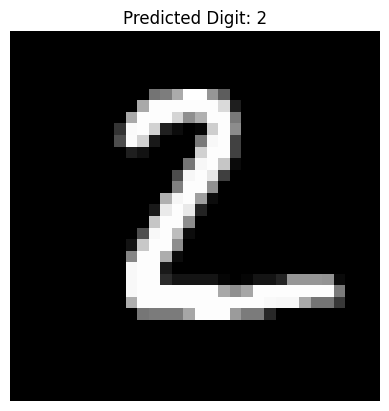

In [55]:
# Forward pass on a single test image
index = 1
x = test_images[index]
y = test_labels[index]
_, probs = lenet5.forward(x, y)
predicted_digit = np.argmax(probs)

plt.imshow(x.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [56]:
import time

start_time = time.time()
x = test_images[0]
y = test_labels[0]
_, probs = lenet5.forward(x, y)
end_time = time.time()

print(f"Time taken for forward pass on one image: {end_time - start_time:.2f} seconds")


Time taken for forward pass on one image: 0.05 seconds
